**타이타닉 탑승장 데이터**  
- Passengerid : 탑승자 데이터 일련번호  
- survived : 생존 여부, 0 = 사망, 1 = 생존  
- pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석  
- sex : 탑승자 성별  
- name : 탑승자 이름  
- Age : 탑승자 나이  
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수  
- parch: 같이 탑승한 부모님 또는 어린이 인원수  
- ticket : 티켓 번호  
- fare : 요금  
- cabin : 선실 번호  
- embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [44]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


- 판다스의 object 타입은 string 타입으로 봐도 무방하다. 

In [45]:
# Null 값을 Age의 경우 평균 나이로, 나머지 칼럼은 'N'값으로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [46]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
C22 C26          3
F33              3
E101             3
F2               3
B5               2
E121             2
C123             2
B51 B53 B55      2
D20              2
E8               2
D17              2
E24              2
B58 B60          2
C93              2
B22              2
D33              2
F G73            2
C68              2
C78              2
C83              2
C126             2
E33              2
C124             2
C2               2
E67              2
              ... 
C50              1
E38              1
A36              1
C128             1
D9               1
B102             1
E12              1
A10              1
C47              1
C99              1
C148             1
A20              1
E49              1
B79              1
D28              1
F G63            1
C82              1
C54   

In [48]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 앞문자만 추출
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [49]:
# 성별에 따른 생존자 수
titanic_df.groupby(['Sex','Survived'])['Survived'].count() # Survived 0은 사망, 1은 생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

여자는 81/233 = 74.2% 생존, 남자는 109/577 = 18.8% 생존

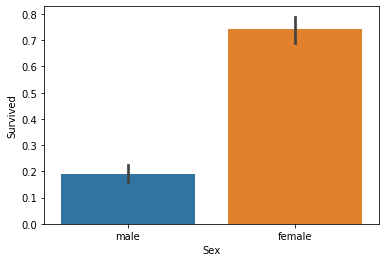

In [50]:
sns.barplot(x='Sex',y='Survived',data=titanic_df) # barplot() ; 가로 막대 차트

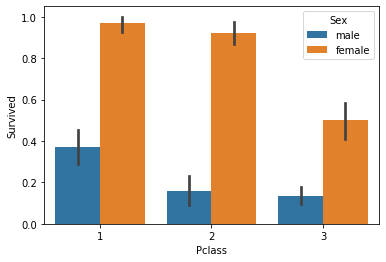

In [51]:
# 객실 등급별로 생존 확률(성별 함께 고려)
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

여자는 1,2등급 모두 생존률이 높으나 3등급으로 가면 생존률이 많이 떨어지는 것을 알 수 있다. 남자의 경우도 등급이 높을수록 생존률이 높지만 남성 1등급의 생존률이 여성 3등급의 생존률보다 낮다

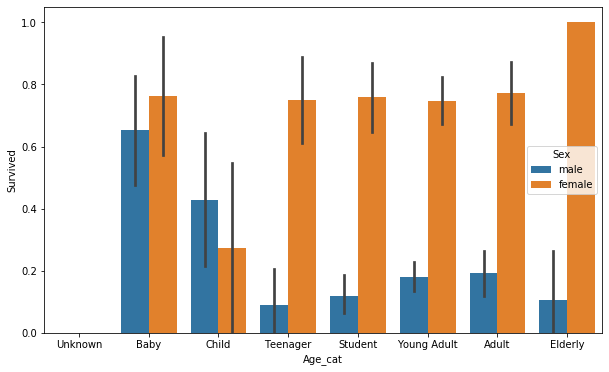

In [52]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- Sex, Age, Pclass 등이 생존 여부에 중요한 특성으로 보인다.

In [53]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
print(titanic_df['Age_cat'].head(3))
titanic_df.drop('Age_cat',axis=1,inplace=True)

0        Student
1          Adult
2    Young Adult
Name: Age_cat, dtype: object


In [54]:
from sklearn import preprocessing

# 문자열 카테고리 -> 숫자형으로 변환
# Label Encoder를 객체로 생성한후 fit()과 transform() 으로 label 인코딩 수행
# LabelEncoder 객체는 카테고리 값의 유형수에 따라 0 ~ (유형수-1)까지의 숫자 값으로 변환
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [61]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신런이 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [62]:
# 원본 데이터를 재로딩하고, feature 데이터 셋과 Label 데이터 셋 추출
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [63]:
# 별도의 테스트 데이터 세트를 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,test_size=0.2, random_state=11)

ML 알고리즘인 DecisionTree, RandomForest, Logistic Regression을 이용하여 생존자 예측  
- train_test_split()으로 분리한 학습 데이터와 데스트 데이터를 기반으로 머신러닝 모델을 학습(fit)하고, 예측(predict)  
- 성능평가는 정확도로 평가 : accuracy_score()를 사용

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
    
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:  0.8324
LogisticRegression 정확도: 0.8659


C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3개의 알고리즘 중 Logistioc Regression이 높은 정확도를 나타내고 있다.  


하지만 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분치 않기 때문에 어떤 알고리즘이 가장 좋은 성능인지 평가할 수는 없다.

In [73]:
# 교차 검증을 위한 kFold 클래스를 사용
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 54개인 KFold객체를 생성, 폴드 수 만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [81]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [85]:
y_titanic_df.head() # Survived

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.000000,2,0,18.0000,7,3
662,1,1,47.000000,0,0,25.5875,4,3
382,3,1,32.000000,0,0,7.9250,7,3
331,1,1,45.500000,0,0,28.5000,2,3
149,2,1,42.000000,0,0,13.0000,7,3
664,3,1,20.000000,1,0,7.9250,7,3
563,3,1,29.699118,0,0,8.0500,7,3
41,2,0,27.000000,1,0,21.0000,7,3
292,2,1,36.000000,0,0,12.8750,3,0
773,3,1,29.699118,0,0,7.2250,7,0


In [83]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
582,2,1,54.000000,0,0,26.0000,7,3
250,3,1,29.699118,0,0,7.2500,7,3
780,3,0,13.000000,0,0,7.2292,7,0
728,2,1,25.000000,1,0,26.0000,7,3
259,2,0,50.000000,0,1,26.0000,7,3


In [84]:
y_train

333    0
662    0
382    0
331    0
149    0
664    1
563    0
41     0
292    0
773    0
631    0
355    0
761    0
791    0
11     1
667    0
143    0
587    1
372    0
309    1
559    1
235    0
325    1
387    1
239    0
334    1
22     1
595    0
592    0
823    1
      ..
657    0
504    1
408    0
888    0
81     1
468    0
231    0
501    0
37     0
842    1
140    0
546    1
637    0
236    0
813    0
416    1
765    1
688    0
604    1
621    1
792    0
850    0
583    0
673    1
332    0
269    1
337    1
91     0
80     0
703    0
Name: Survived, Length: 712, dtype: int64

In [87]:
y_test

431    1
821    1
629    0
626    0
665    0
582    0
250    0
780    1
728    0
259    1
232    0
371    0
552    0
87     0
815    0
243    0
46     0
134    0
434    0
381    1
883    0
698    0
652    0
60     0
538    0
277    0
463    0
783    0
733    0
92     0
      ..
405    0
633    0
394    1
49     0
411    0
316    1
341    1
336    0
770    0
852    0
289    1
725    0
247    1
179    0
376    1
485    0
293    0
879    1
187    1
189    0
809    1
470    0
618    1
361    0
861    0
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

In [88]:
# 교차 검증을 위한 cross_val_score() 사용
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))
    
print("평균정확도: {0: .4f}".format(np.mean(scores)))

교차검증 0 정확도: 0.7430
교차검증 1 정확도: 0.7765
교차검증 2 정확도: 0.7809
교차검증 3 정확도: 0.7753
교차검증 4 정확도: 0.8418
평균정확도:  0.7835


kFold와 cross_val_score의 점수가 다른 이유는 cross_val_score 는 StratifiedKFold를 이용해 세트를 분할하기 때문이다.

**GridSearchCV(모형최적화도구)**를 이용하여 DecisionTreeClassifier 최적 하이퍼 파라미터를 찾고, 예측 성능을 측정한다.


- CV = 5(교차 검증을 위해 분할되는 폴드 수)로 지정하고, max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능을 측정한다.  
- 최적 하이퍼 파라미터와 그 때의 예측을 출력하고, 최적 하이퍼파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행하여 정확도 측정한다.

In [92]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5) # cv : 교차 검증을 위해 분할되는 폴드 수
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_) # 최고 점수를 낸 파라미터
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_)) # 최고 점수
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


최적 하이퍼 파라미터인 max_depth = 3, min_samples_leaf = 1, min_samples_split = 2 로 DecisionClassifier를 학습시킨 뒤 모델 정확도가 약 87.15%로 향상한다.